In [196]:
import random
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns 
pd.options.mode.chained_assignment = None  # default='warn'

tom = [419, 398, 469.5, 463.5, 468.5, 490.5, 495, 493, 526, 477, 439.5, 493.5, 426, 521, 547.5, 471]
freewoe = [389.5, 428, 499, 550.5, 454, 490, 523.5, 467,516, 453.5, 494, 455.5, 546.5, 504.5, 426.5, 511.5]
ola = [316.5, 364.5,450, 451.5, 434.5, 436.5, 397.5, 387, 456, 423, 423, 464, 388, 401, 366, 454.5]
ham = [310, 450.5, 404, 338.5, 482, 419, 477, 471, 470, 328.5, 460.5, 472, 477.5, 422, 406, 461.5]
jaja = [447.5, 442.5, 356, 357.5, 435, 423, 423.5, 418.5, 523, 418.5, 449, 546, 426, 436, 452.5, 428]
cannon = [455.5, 439.5, 446.5, 539.5, 477, 421, 412.5, 481, 396.5, 381.5, 440.5, 435, 528, 450.5, 503.5, 418.5]
sha = [402.5, 462.5, 452.5, 399, 324, 410.5, 542.5, 461, 478.5, 517, 495.5, 405, 378.5, 445.5, 444, 451.5]
burrito = [466, 453.5, 424.5, 396, 473.5, 472, 377, 394.5, 425, 484.5, 388.5, 482, 456.5, 534.5, 411, 492]

players = {"freewoe" : freewoe, "tom" : tom, "cannon": cannon,
"sha" : sha, "ham": ham, "burrito" :burrito, "jaja" : jaja,
"ola" : ola}

cols = ["Week_%s" % str(x) for x in range(1,17)]
df = pd.DataFrame(data=list(players.values()), columns = cols, index=[i for i in players.keys()])

vols = {}
means = {}
for player, stats in players.items():
    v = np.std(stats)
    vols[player] = v
    tot = np.sum(stats)
    means[player] = tot/16 ## dividing by number of active matchups--first week was BYE
    
vols_sorted = dict(sorted(vols.items(), key = lambda vols: vols[1], reverse=True))
means_sorted = dict(sorted(means.items(), key = lambda means: means[1], reverse= True))
means_sorted

{'freewoe': 481.84375,
 'tom': 474.90625,
 'cannon': 451.65625,
 'burrito': 445.6875,
 'sha': 441.875,
 'jaja': 436.40625,
 'ham': 428.125,
 'ola': 413.34375}

In [197]:
df

,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Week_16
freewoe,389.5,428.0,499.0,550.5,454.0,490.0,523.5,467.0,516.0,453.5,494.0,455.5,546.5,504.5,426.5,511.5
tom,419.0,398.0,469.5,463.5,468.5,490.5,495.0,493.0,526.0,477.0,439.5,493.5,426.0,521.0,547.5,471.0
cannon,455.5,439.5,446.5,539.5,477.0,421.0,412.5,481.0,396.5,381.5,440.5,435.0,528.0,450.5,503.5,418.5
sha,402.5,462.5,452.5,399.0,324.0,410.5,542.5,461.0,478.5,517.0,495.5,405.0,378.5,445.5,444.0,451.5
ham,310.0,450.5,404.0,338.5,482.0,419.0,477.0,471.0,470.0,328.5,460.5,472.0,477.5,422.0,406.0,461.5
burrito,466.0,453.5,424.5,396.0,473.5,472.0,377.0,394.5,425.0,484.5,388.5,482.0,456.5,534.5,411.0,492.0
jaja,447.5,442.5,356.0,357.5,435.0,423.0,423.5,418.5,523.0,418.5,449.0,546.0,426.0,436.0,452.5,428.0
ola,316.5,364.5,450.0,451.5,434.5,436.5,397.5,387.0,456.0,423.0,423.0,464.0,388.0,401.0,366.0,454.5


In [198]:
names = df.index.tolist()
df["Player"] = names
df["Average"] = 0
df["Volatility"] = 0

for index in df.index:
    df.loc[index,"Average"] = means_sorted[index]
    df.loc[index, "Volatility"] = vols_sorted[index]

cols = df.columns.tolist()
cols = cols[-3:] + cols[:-3]
df = df[cols]
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)
df

,Player,Average,Volatility,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Week_14,Week_15,Week_16
0,freewoe,481.84375,43.789168,389.5,428.0,499.0,550.5,454.0,490.0,523.5,467.0,516.0,453.5,494.0,455.5,546.5,504.5,426.5,511.5
1,tom,474.90625,38.915461,419.0,398.0,469.5,463.5,468.5,490.5,495.0,493.0,526.0,477.0,439.5,493.5,426.0,521.0,547.5,471.0
2,cannon,451.65625,43.203631,455.5,439.5,446.5,539.5,477.0,421.0,412.5,481.0,396.5,381.5,440.5,435.0,528.0,450.5,503.5,418.5
3,sha,441.87500,52.822965,402.5,462.5,452.5,399.0,324.0,410.5,542.5,461.0,478.5,517.0,495.5,405.0,378.5,445.5,444.0,451.5
4,ham,428.12500,55.346776,310.0,450.5,404.0,338.5,482.0,419.0,477.0,471.0,470.0,328.5,460.5,472.0,477.5,422.0,406.0,461.5
5,burrito,445.68750,43.352795,466.0,453.5,424.5,396.0,473.5,472.0,377.0,394.5,425.0,484.5,388.5,482.0,456.5,534.5,411.0,492.0
6,jaja,436.40625,46.061853,447.5,442.5,356.0,357.5,435.0,423.0,423.5,418.5,523.0,418.5,449.0,546.0,426.0,436.0,452.5,428.0
7,ola,413.34375,40.151945,316.5,364.5,450.0,451.5,434.5,436.5,397.5,387.0,456.0,423.0,423.0,464.0,388.0,401.0,366.0,454.5


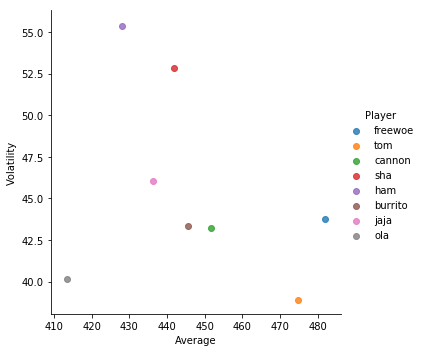

In [263]:
# fig, ax = plt.subplots(figsize = (10,9))
# sns.regplot(x = df["Average"], y = df["Volatility"], fit_reg=True)
x = sns.lmplot(fit_reg=False,x = "Average", y = "Volatility", hue = "Player", data = df)
plt.show()

### Remaining Games

##### Example with two players

In [350]:
np.random.seed(1)

fwoe = ["ola", "jaja"]
f_avg = df[df["Player"] == "freewoe"]["Average"][0]
f_vol = df[df["Player"] == "freewoe"]["Volatility"][0]


opp = {}
for x in fwoe:
    opp_avg = list(df[df["Player"] == x]["Average"])
    opp_vol = list(df[df["Player"] == x]["Volatility"])
    opp[x] = opp_avg, opp_vol 

m = opp["ola"][0][0] 
v = opp["ola"][1][0]
ola_range = m-v, m+v

f_range = f_avg - f_vol, f_avg + f_vol

f_range, ola_range


result = 0
for i in range(100000):
    f_rand = np.random.randint(f_range[0], f_range[1])
    o_rand = np.random.randint(ola_range[0], ola_range[1])
    diff = f_rand - o_rand 
    if diff > 0: ## this means frisco won as he had the greater number and the diff is positive 
        result += 1 

print("Freewoe has a {}% chance of winning against Ola".format((result/100000)*100))

Freewoe has a 98.327% chance of winning against Ola


In [351]:
f_range, t_range

((438.05458226484546, 525.63291773515459),
 (435.9907892428986, 513.8217107571014))

In [356]:
t_avg = list(df[df["Player"] == "tom"]["Average"])[0]
t_vol = list(df[df["Player"] == "tom"]["Volatility"])[0]

t_range = t_avg - t_vol, t_avg + t_vol
t_range

blah = 0
for i in range(100000):
    f_rand = np.random.randint(f_range[0], f_range[1])
    t_rand = np.random.randint(t_range[0], t_range[1])
    diff = f_rand - t_rand 
    if diff > 0: ## this means frisco won as he had the greater number and the diff is positive 
        blah += 1 

print("Freewoe has a {}% chance of winning against Tom".format((blah/100000)*100))

Freewoe has a 58.555% chance of winning against Tom


1. how to rearrange dataframe columns pandas
2. How to populate specific index and col combo in dataframe
3. How to initialize empty dataframe 
4. How to use seaborn for scatterplots and condition on different players 
